In [192]:
import pandas as pd
import numpy as np

1. Chargez le jeu de données en utilisant Pandas. 

In [193]:
# data = pd.read_csv('./health_dataset.csv')
# # Generate mock data
# num_samples = 100
# age = np.random.randint(20, 70, num_samples)
# gender = np.random.choice(['Male', 'Female'], num_samples)
# sleep_hours = np.random.randint(4, 10, num_samples)
# physical_activity = np.random.randint(0, 5, num_samples)
# blood_pressure = np.random.randint(100, 160, num_samples)
# cholesterol = np.random.randint(150, 250, num_samples)
# blood_sugar = np.random.randint(70, 130, num_samples)

# # Create a DataFrame
# mock_data = pd.DataFrame({
#     'age': age,
#     'gender': gender,
#     'sleep_hours': sleep_hours,
#     'physical_activity': physical_activity,
#     'blood_pressure': blood_pressure,
#     'cholesterol': cholesterol,
#     'blood_sugar': blood_sugar
# })

# # Concatenate the mock data with the existing data
# data = pd.concat([data, mock_data], ignore_index=True)

# # Save the new data
# # data.to_csv('./health_dataset.csv', index=False)

In [194]:
data = pd.read_csv('./health_dataset.csv')
data

,age,gender,sleep_hours,physical_activity,blood_pressure,cholesterol,blood_sugar
0,73.0,Femme,8.184872,Intense,73.0,155,124
1,28.0,Femme,4.329605,Intense,28.0,234,87
2,42.0,Femme,5.903738,Moderee,42.0,168,121
3,24.0,Femme,9.072578,Faible,24.0,237,89
4,44.0,Femme,9.726629,Moderee,44.0,236,87
...,...,...,...,...,...,...,...
94,55.0,Homme,6.737818,Intense,55.0,245,101
95,30.0,Femme,9.764071,Faible,30.0,231,114
96,53.0,Femme,9.126297,Moderee,53.0,214,98
97,21.0,Femme,7.151667,Intense,21.0,216,128


In [195]:
# Statistiques descriptives de base (moyenne, médiane, écart-type, etc.)
moyenne = data.mean(numeric_only=True)
mediane = data.median(numeric_only=True)
ecart_type = data.std(numeric_only=True)

# print(moyenne)
# print('-------------------')
# print(mediane)
# print('-------------------')
# print(ecart_type)

data.describe()

,age,sleep_hours,blood_pressure,cholesterol,blood_sugar
count,90.000000,99.000000,90.000000,99.000000,99.000000
mean,48.400000,6.918111,48.400000,198.555556,109.404040
std,18.162067,2.213204,18.162067,41.550859,26.873445
min,18.000000,0.000000,18.000000,-1.000000,0.000000
25%,33.250000,5.627335,33.250000,173.000000,91.000000
50%,46.500000,7.212311,46.500000,197.000000,114.000000
75%,63.750000,8.762006,63.750000,232.500000,129.000000
max,79.000000,9.942776,79.000000,249.000000,149.000000


In [196]:
# preprocessing data, handle missing values
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.median())

# preprocessing data, nun numeric columns
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])

data

,age,gender,sleep_hours,physical_activity,blood_pressure,cholesterol,blood_sugar
0,73.0,Femme,8.184872,Intense,73.0,155,124
1,28.0,Femme,4.329605,Intense,28.0,234,87
2,42.0,Femme,5.903738,Moderee,42.0,168,121
3,24.0,Femme,9.072578,Faible,24.0,237,89
4,44.0,Femme,9.726629,Moderee,44.0,236,87
...,...,...,...,...,...,...,...
94,55.0,Homme,6.737818,Intense,55.0,245,101
95,30.0,Femme,9.764071,Faible,30.0,231,114
96,53.0,Femme,9.126297,Moderee,53.0,214,98
97,21.0,Femme,7.151667,Intense,21.0,216,128


Visualisation de la distribution des variables numériques à l'aide d'histogrammes

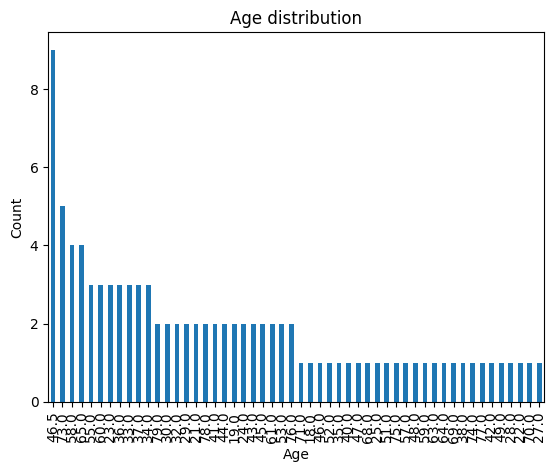

In [197]:
# Visualisation de la distribution des variables numériques à l'aide d'histogrammes
import matplotlib.pyplot as plt

data['age'].value_counts().plot(kind='bar')
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


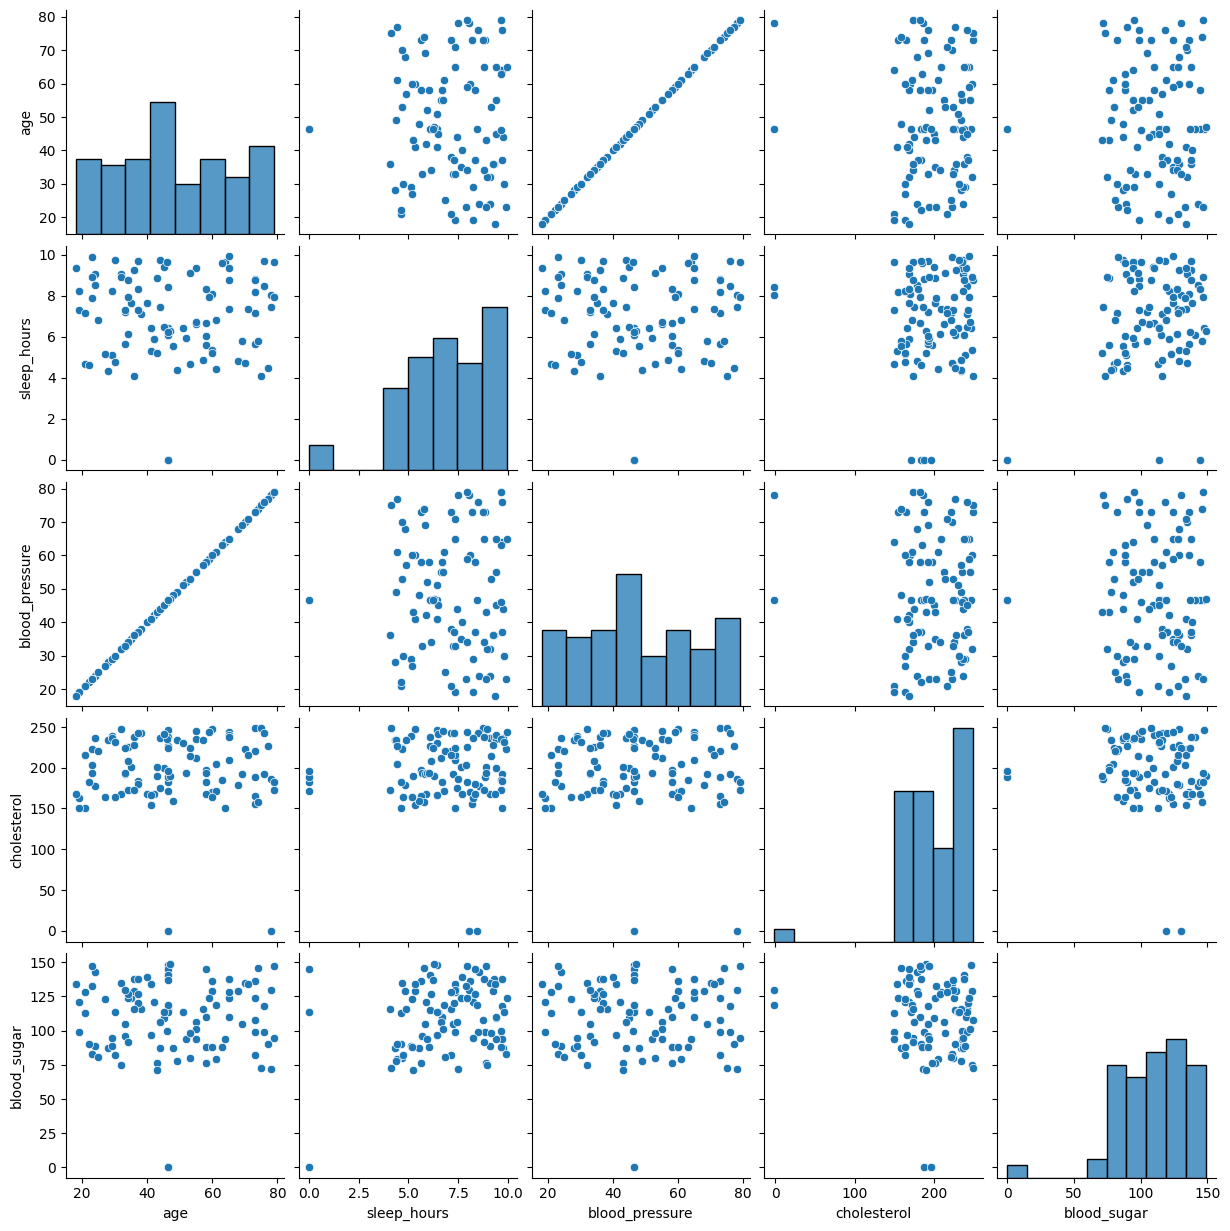

In [198]:
# Visualisation des relations entre les variables numériques avec des scatter plots. 
import seaborn as sns

sns.pairplot(data[numeric_columns.columns])
plt.show()

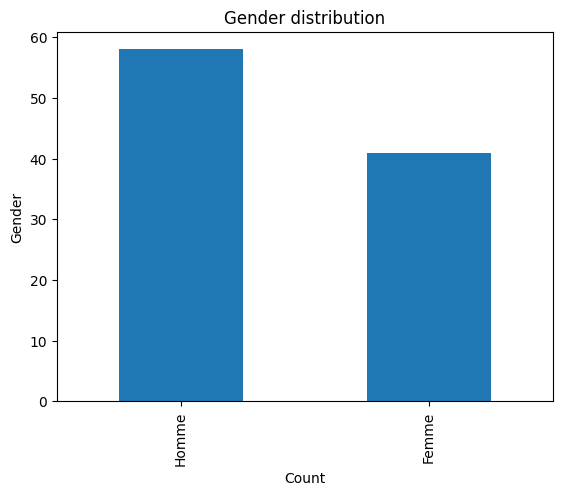

In [199]:
# Exploration des relations entre les variables catégorielles avec des diagrammes en barres

data['gender'].value_counts().plot(kind='bar')
plt.title('Gender distribution')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.show()

### Partie 2

In [ ]:
# 2. Détectez et traitez les valeurs aberrantes
# q1, q3
q1 = data[numeric_columns.columns].quantile(0.25)
q3 = data[numeric_columns.columns].quantile(0.75)
iqr = q3 - q1

# print(q1)
# print('-------------------')
# print(q3)

# print('-------------------')
# print(iqr)

lower_bound = q1 - iqr * 1.5 
upper_bound = q3 + iqr * 1.5 


df = data[(
    (data[numeric_columns.columns] >= lower_bound)
    &
    (data[numeric_columns.columns] <= upper_bound)
    ).all(axis=1)]

df2 = data[(
    (data[numeric_columns.columns] < lower_bound)
    |
    (data[numeric_columns.columns] > upper_bound)
    ).any(axis=1)]


# print(data.shape)
# print(df2.shape)
# print(df.shape)

# drop outliers
data = df

data


,age,gender,sleep_hours,physical_activity,blood_pressure,cholesterol,blood_sugar
17,58.0,Homme,6.668742,Faible,58.0,182,110
23,35.0,Homme,7.651742,Faible,35.0,201,124
29,46.5,Homme,6.064477,Faible,46.5,227,115
31,34.0,Homme,7.948105,Intense,34.0,225,124
46,55.0,Homme,6.615104,Faible,55.0,212,106
62,44.0,Homme,7.453170,Moderee,44.0,175,106
66,52.0,Homme,5.942658,Moderee,52.0,194,94
68,37.0,Homme,8.313040,Moderee,37.0,180,127
83,34.0,Femme,6.114325,Moderee,34.0,208,127
86,51.0,Homme,6.438927,Intense,51.0,230,114


Convertissez les variables catégorielles en variables numériques par encodage
approprié.

In [202]:
# using label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['physical_activity'] = encoder.fit_transform(df['physical_activity'])
df

/var/folders/8g/97sm46vn1sq512g0vp4y9rw00000gn/T/ipykernel_8934/3872876809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['physical_activity'] = encoder.fit_transform(df['physical_activity'])


,age,gender,sleep_hours,physical_activity,blood_pressure,cholesterol,blood_sugar
17,58.0,Homme,6.668742,0,58.0,182,110
23,35.0,Homme,7.651742,0,35.0,201,124
29,46.5,Homme,6.064477,0,46.5,227,115
31,34.0,Homme,7.948105,1,34.0,225,124
46,55.0,Homme,6.615104,0,55.0,212,106
62,44.0,Homme,7.453170,2,44.0,175,106
66,52.0,Homme,5.942658,2,52.0,194,94
68,37.0,Homme,8.313040,2,37.0,180,127
83,34.0,Femme,6.114325,2,34.0,208,127
86,51.0,Homme,6.438927,1,51.0,230,114


In [209]:
# using one hot encoder
df = pd.get_dummies(df, columns=['physical_activity'])
# using 0, 1 instead of booleans
# df['physical_activity_0'] = df['physical_activity_0'].astype('int')
df

,age,gender,sleep_hours,blood_pressure,cholesterol,blood_sugar,physical_activity_0,physical_activity_1,physical_activity_2
17,58.0,Homme,6.668742,58.0,182,110,1,False,False
23,35.0,Homme,7.651742,35.0,201,124,1,False,False
29,46.5,Homme,6.064477,46.5,227,115,1,False,False
31,34.0,Homme,7.948105,34.0,225,124,0,True,False
46,55.0,Homme,6.615104,55.0,212,106,1,False,False
62,44.0,Homme,7.453170,44.0,175,106,0,False,True
66,52.0,Homme,5.942658,52.0,194,94,0,False,True
68,37.0,Homme,8.313040,37.0,180,127,0,False,True
83,34.0,Femme,6.114325,34.0,208,127,0,False,True
86,51.0,Homme,6.438927,51.0,230,114,0,True,False


4. Normalisez ou standardisez les variables numériques si nécessaire. 

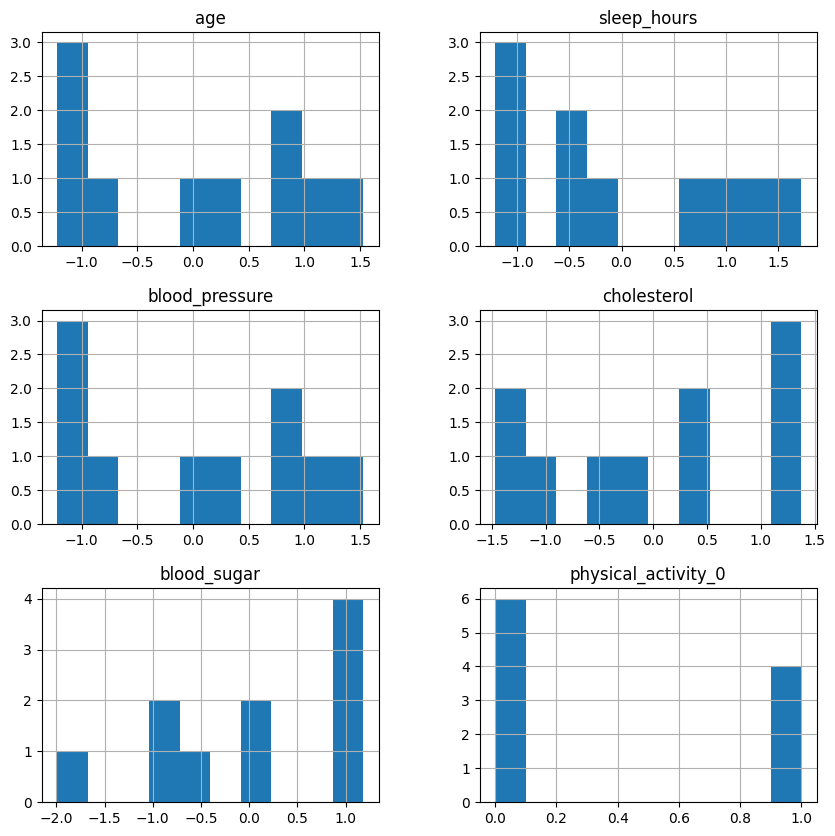

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Appliquer la standardisation
df[numeric_columns.columns] = scaler.fit_transform(df[numeric_columns.columns])

# Afficher les valeurs standardisées
pd.set_option('display.float_format', '{:.2f}'.format)

df.describe()


